In [1]:
from ultralytics import YOLO
import supervision as sv
import cv2

# Carregar o modelo YOLOv8
model = YOLO('yolov8n.pt') # yolov3-v7
model.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou


0: 448x640 6 persons, 4 cars, 1 motorcycle, 1 bus, 1 handbag, 186.1ms
Speed: 14.0ms preprocess, 186.1ms inference, 1249.7ms postprocess per image at shape (1, 3, 448, 640)


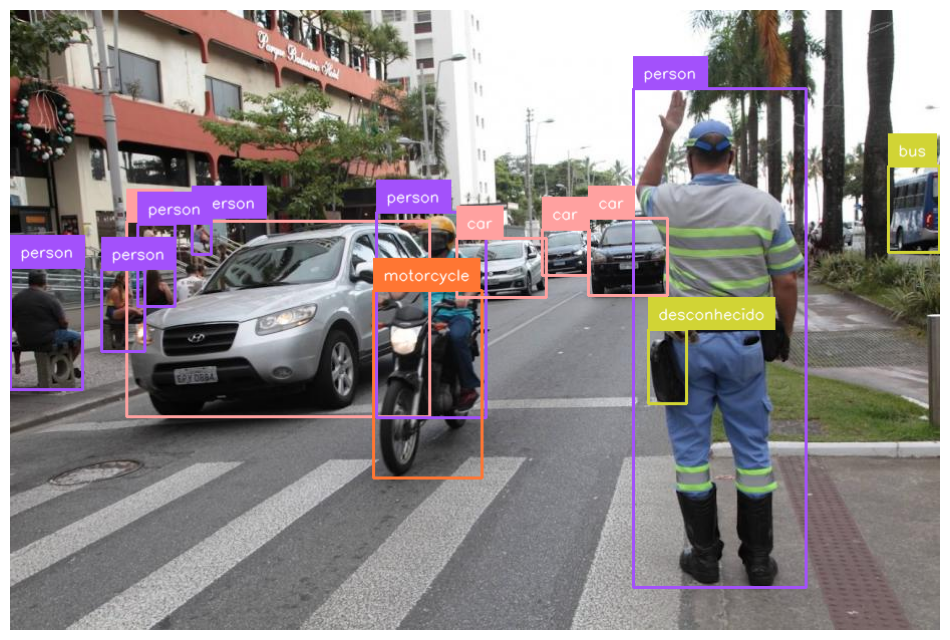

In [2]:
# Carregar a imagem
path = ''
imagem = cv2.imread("files/carros-image.jpg")
#imagem = cv2.imread("sinais-de-transito.jpg")
#imagem = cv2.imread("cachorro-transito.jpeg")
#imagem = cv2.imread('caos-total.jpg')

# Obter as previsões de detecção de objetos na imagem
resultados = model(imagem)[0]

# Carregar as previsões no Supervision
deteccoes = sv.Detections.from_ultralytics(resultados)

# Anotar a imagem com as previsões de detecção de carros
anotador_caixa_limitadora = sv.BoundingBoxAnnotator()
anotador_rotulo = sv.LabelAnnotator()

mapa_classes = {
    0: 'person',
    1: 'bicycle',
    2: 'car',
    3: 'motorcycle',
    5: 'bus',
    6: 'train',
    7: 'truck',
    9: 'traffic light',
    11: 'stop sign',
    12: 'parking meter',
    16: 'dog',
}

# Atribuir rótulos com base nos IDs das classes
rotulos = [mapa_classes.get(id_da_classe, "desconhecido") for id_da_classe in deteccoes.class_id]

imagem_anotada = anotador_caixa_limitadora.annotate(
    scene = imagem, detections = deteccoes)
imagem_anotada = anotador_rotulo.annotate(
    scene = imagem_anotada, detections = deteccoes, labels = rotulos)

# Exibir a imagem anotada
sv.plot_image(imagem_anotada)

In [7]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw

# Carregar o modelo pré-treinado Faster R-CNN
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Definir as classes do COCO dataset
CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut',
    'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
    'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
    'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Carregar uma imagem de exemplo
#image = Image.open('caos-total.jpg')
image = Image.open('files/carros-image.jpg')
#image = Image.open('cachorro-transito.jpg')
#image = Image.open('sinais-de-transito.jpg')

image_tensor = F.to_tensor(image)

# Executar a detecção de veículos
with torch.no_grad():
    prediction = model([image_tensor])

# Visualizar as detecções na imagem
draw = ImageDraw.Draw(image)
for score, label, box in zip(prediction[0]['scores'], prediction[0]['labels'], prediction[0]['boxes']):
    if CLASSES[label] == 'car' or CLASSES[label] == 'bus' or CLASSES[label] == 'truck' or CLASSES[label] == 'person':
        draw.rectangle(box.tolist(), outline='red', width=3)
        draw.text((box[0], box[1]), f'{CLASSES[label]}: {score:.2f}', fill='red')

image.show()

In [12]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # load an official model
#model = YOLO('path/to/best.pt')  # load a custom model

# Predict with the model
results = model('files/carros-image.jpg')  # predict on an image


image 1/1 C:\Users\gusta\Documents\Faculdade\Programa k\Organizao de Trafego\organizacao-trafego\files\carros-image.jpg: 448x640 6 persons, 4 cars, 1 motorcycle, 1 bus, 1 handbag, 159.2ms
Speed: 15.6ms preprocess, 159.2ms inference, 15.8ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
model = YOLO('yolov8n.pt')  # load an official model

results = model.track(source='files/cars-video.mp4', show=True)  # detect and track on a video

#source = 0 usa a webcam
#source = 'video.mp4' usa um arquivo de vídeo